In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
gics = pd.read_excel('/content/GICS.xlsx')
gics['Date'] = pd.to_datetime(gics['Date'])
gics = gics[gics['Date'].notna()]
# gics = gics.set_index('Date')
gics.columns

Index(['Date', 'Energy', 'Utilities', 'IT', 'Materials', 'Industrials',
       'ConsumerDiscretionary', 'ConsumerStaples', 'healthcare', 'Financials',
       'CommunicationServices', 'RealEstate', 'sp500', 'wti_spot', 'VIX',
       'FedFunds', 'inflation_yoy', 'UNRATE', 'INDPRO'],
      dtype='object')

In [ ]:
gepu = pd.read_excel('/content/data_gpr_daily_recent.xls')
gepu = gepu[['date', 'GPRD_ACT']]
gepu['Date'] = pd.to_datetime(gepu['date']).drop_duplicates()
gepu = gepu.drop(columns=['date'])
gepu = gepu[(gepu['Date'] >= '2005-01-07') & (gepu['Date'] <= '2024-12-27')]
gepu.set_index('Date', inplace=True)
gepu = gepu.resample('W').mean()
gepu.reset_index(inplace=True)
gepu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1043 non-null   datetime64[ns]
 1   GPRD_ACT  1043 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.4 KB


In [ ]:
df = pd.concat([gics, gepu['GPRD_ACT']], axis=1)
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2005-01-07 to 2024-12-27
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Energy                 1043 non-null   float64
 1   Utilities              1043 non-null   float64
 2   IT                     1043 non-null   float64
 3   Materials              1043 non-null   float64
 4   Industrials            1043 non-null   float64
 5   ConsumerDiscretionary  1043 non-null   float64
 6   ConsumerStaples        1043 non-null   float64
 7   healthcare             1043 non-null   float64
 8   Financials             1043 non-null   float64
 9   CommunicationServices  1043 non-null   float64
 10  RealEstate             1043 non-null   float64
 11  sp500                  1043 non-null   float64
 12  wti_spot               1043 non-null   float64
 13  VIX                    1043 non-null   float64
 14  FedFunds               1043 non-null  

In [ ]:
df['oil_returns'] = df['Energy'].pct_change() * 100
df['equity_returns'] = df['sp500'].pct_change() * 100
df['wti_returns'] = df['wti_spot'].pct_change() * 100

regression_df = df[['oil_returns', 'equity_returns', 'wti_returns', 'Utilities', 'IT', 'Materials', 'Industrials', 'ConsumerDiscretionary', 'ConsumerStaples', 'healthcare', 'Financials', 'CommunicationServices', 'RealEstate', 'VIX', 'FedFunds', 'inflation_yoy', 'UNRATE', 'INDPRO', 'GPRD_ACT']].dropna()

display(regression_df.head())
regression_df.info()

,oil_returns,equity_returns,wti_returns,Utilities,IT,Materials,Industrials,ConsumerDiscretionary,ConsumerStaples,healthcare,Financials,CommunicationServices,RealEstate,VIX,FedFunds,inflation_yoy,UNRATE,INDPRO,GPRD_ACT
Date,,,,,,,,,,,,,,,,,,,
2005-01-14,3.526882,-0.140787,6.171999,139.93,316.34,178.17,280.46,272.62,238.60,344.68,400.20,122.03,114.63,12.43,2.25,0.028449,5.3,95.8785,118.171079
2005-01-21,-0.512394,-1.405633,2.265441,139.53,307.49,175.74,275.18,266.17,237.98,340.69,396.96,120.75,115.50,14.36,2.28,0.028449,5.3,95.8785,124.955126
2005-01-28,2.098413,0.298835,1.483804,142.75,308.91,175.57,278.66,264.30,239.43,338.96,396.53,119.34,111.19,13.24,2.27,0.028449,5.3,95.8785,136.435122
2005-02-04,6.067010,2.703695,-3.274300,147.91,316.27,181.67,283.76,269.95,243.74,345.94,408.69,123.30,115.11,11.21,2.43,0.030530,5.4,96.5709,128.405587
2005-02-11,2.618979,0.188690,-1.894826,147.25,315.58,182.87,285.35,269.58,241.74,347.25,410.18,120.51,117.55,11.43,2.50,0.030530,5.4,96.5709,112.565581


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2005-01-14 to 2024-12-27
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   oil_returns            1042 non-null   float64
 1   equity_returns         1042 non-null   float64
 2   wti_returns            1042 non-null   float64
 3   Utilities              1042 non-null   float64
 4   IT                     1042 non-null   float64
 5   Materials              1042 non-null   float64
 6   Industrials            1042 non-null   float64
 7   ConsumerDiscretionary  1042 non-null   float64
 8   ConsumerStaples        1042 non-null   float64
 9   healthcare             1042 non-null   float64
 10  Financials             1042 non-null   float64
 11  CommunicationServices  1042 non-null   float64
 12  RealEstate             1042 non-null   float64
 13  VIX                    1042 non-null   float64
 14  FedFunds               1042 non-null  

Running Naive Quantile Regression...
Running Static IV Quantile Regression...
Running Dynamic IV Quantile Regression...


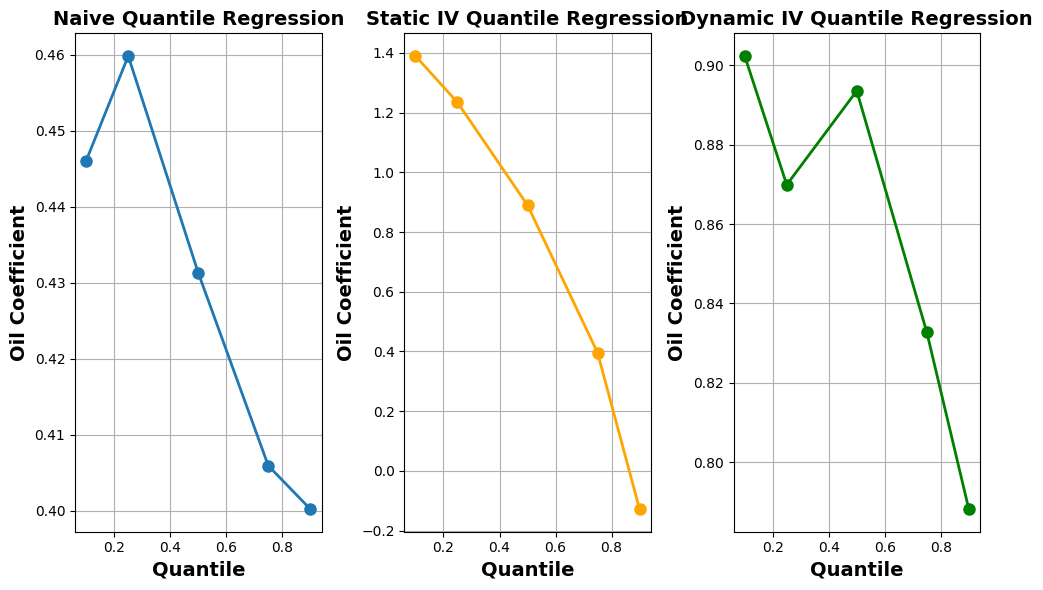


OIL-EQUITY RELATIONSHIP ANALYSIS SUMMARY

Sample period: 2005-01-21 00:00:00 to 2024-12-27 00:00:00
Observations: 1041

Quantile Regression Coefficients (Oil → Equity):
Quantile	Naive QR	Static IVQR	Dynamic IVQR
-------------------------------------------------------
0.10		0.4461		1.3898		0.9024
0.25		0.4599		1.2344		0.8699
0.50		0.4313		0.8900		0.8936
0.75		0.4059		0.3962		0.8328
0.90		0.4002		-0.1279		0.7882

Running sector-specific analysis...


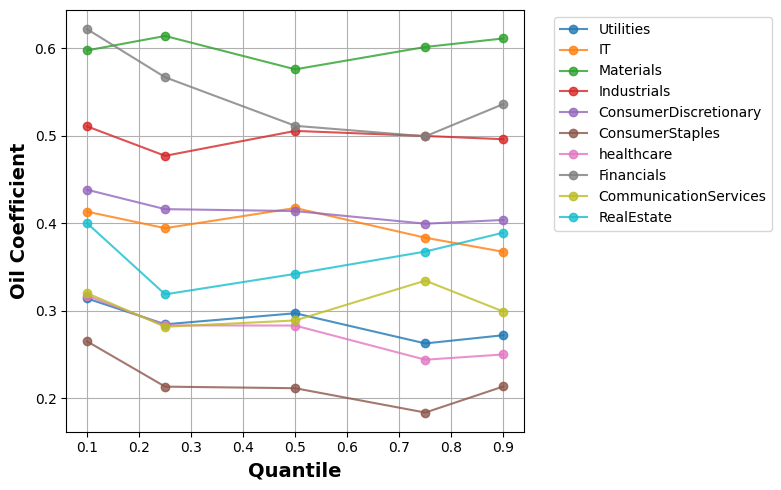


Running robustness checks with different instrument sets...
Testing instrument set: Set1
Testing instrument set: Set2
Testing instrument set: Set3


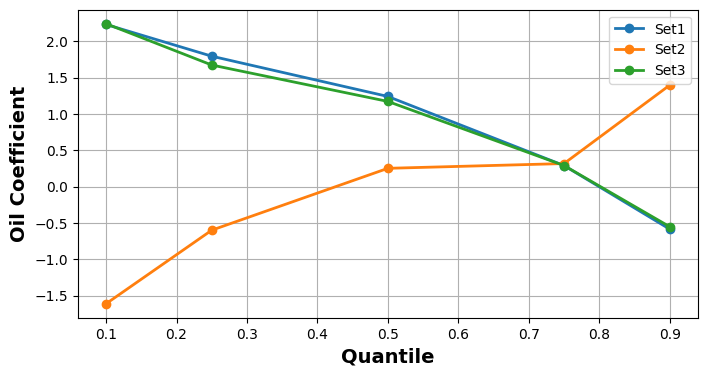


Analysis complete! Key findings:
1. Compare coefficients across quantiles to understand heterogeneous effects
2. IVQR helps address endogeneity in oil-equity relationship
3. Dynamic model captures persistence and time-varying effects
4. Check sector-specific sensitivities to oil price changes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels import IV2SLS, IVGMM
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.api import OLS, add_constant
import warnings
warnings.filterwarnings('ignore')


# Create lagged variables for dynamic analysis
df['oil_returns_lag1'] = df['oil_returns'].shift(1)
df['equity_returns_lag1'] = df['equity_returns'].shift(1)
df['VIX_lag1'] = df['VIX'].shift(1)

# Drop missing values from lag creation
df_clean = df.dropna()

# Define quantiles to analyze
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# 2. Naive Quantile Regression
def naive_quantile_regression(df, quantiles):
    """Perform naive quantile regression of equity returns on oil returns"""
    results = {}

    X = df[['oil_returns']]
    X = add_constant(X)
    y = df['equity_returns']

    for tau in quantiles:
        model = QuantReg(y, X)
        result = model.fit(q=tau)
        results[tau] = {
            'params': result.params,
            'pvalues': result.pvalues,
            'conf_int': result.conf_int()
        }

    return results

# 3. Static IV Quantile Regression
def static_iv_qr(df, quantiles, instruments):
    """Static IV Quantile Regression using control function approach"""
    results = {}

    # First stage: oil_returns on instruments
    X_first = add_constant(df[instruments])
    y_first = df['oil_returns']

    first_stage = OLS(y_first, X_first).fit()
    df['oil_hat'] = first_stage.fittedvalues
    df['residuals'] = first_stage.resid

    # Second stage: quantile regression with control function
    for tau in quantiles:
        X_second = add_constant(df[['oil_hat', 'residuals']])
        y_second = df['equity_returns']

        model = QuantReg(y_second, X_second)
        result = model.fit(q=tau)

        results[tau] = {
            'params': result.params,
            'pvalues': result.pvalues,
            'conf_int': result.conf_int()
        }

    return results

# 4. Dynamic IV Quantile Regression
def dynamic_iv_qr(df, quantiles, instruments):
    """Dynamic IV Quantile Regression with lagged variables"""
    results = {}

    # First stage: oil_returns on instruments and lags
    X_first = add_constant(df[instruments + ['oil_returns_lag1', 'equity_returns_lag1', 'VIX_lag1']])
    y_first = df['oil_returns']

    first_stage = OLS(y_first, X_first).fit()
    df['oil_hat_dynamic'] = first_stage.fittedvalues
    df['residuals_dynamic'] = first_stage.resid

    # Second stage: quantile regression with control function and lags
    for tau in quantiles:
        X_second = add_constant(df[['oil_hat_dynamic', 'residuals_dynamic',
                                  'oil_returns_lag1', 'equity_returns_lag1', 'VIX_lag1']])
        y_second = df['equity_returns']

        model = QuantReg(y_second, X_second)
        result = model.fit(q=tau)

        results[tau] = {
            'params': result.params,
            'pvalues': result.pvalues,
            'conf_int': result.conf_int()
        }

    return results

# 5. Run all models
# Define instruments (economic variables that affect oil but not equity directly)
instruments = ['VIX', 'FedFunds', 'inflation_yoy', 'UNRATE', 'INDPRO', 'GPRD_ACT']

print("Running Naive Quantile Regression...")
naive_results = naive_quantile_regression(df_clean, quantiles)

print("Running Static IV Quantile Regression...")
static_iv_results = static_iv_qr(df_clean, quantiles, instruments)

print("Running Dynamic IV Quantile Regression...")
dynamic_iv_results = dynamic_iv_qr(df_clean, quantiles, instruments)

# 6. Visualization function
def plot_results(naive_results, static_results, dynamic_results, quantiles):
    """Plot comparison of results across methods"""
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))

    # Extract oil coefficients
    naive_coefs = [naive_results[tau]['params']['oil_returns'] for tau in quantiles]
    static_coefs = [static_results[tau]['params']['oil_hat'] for tau in quantiles]
    dynamic_coefs = [dynamic_results[tau]['params']['oil_hat_dynamic'] for tau in quantiles]

    # Naive QR
    axes[0].plot(quantiles, naive_coefs, 'o-', linewidth=2, markersize=8)
    axes[0].set_title('Naive Quantile Regression', fontsize = 14, fontweight='bold')
    axes[0].set_xlabel('Quantile',  fontsize = 14, fontweight='bold')
    axes[0].set_ylabel('Oil Coefficient',  fontsize = 14, fontweight='bold')
    axes[0].grid()

    # Static IVQR
    axes[1].plot(quantiles, static_coefs, 'o-', linewidth=2, markersize=8, color='orange')
    axes[1].set_title('Static IV Quantile Regression',  fontsize = 14, fontweight='bold')
    axes[1].set_xlabel('Quantile',  fontsize = 14, fontweight='bold')
    axes[1].set_ylabel('Oil Coefficient',  fontsize = 14, fontweight='bold')
    axes[1].grid()

    # Dynamic IVQR
    axes[2].plot(quantiles, dynamic_coefs, 'o-', linewidth=2, markersize=8, color='green')
    axes[2].set_title('Dynamic IV Quantile Regression',  fontsize = 14, fontweight='bold')
    axes[2].set_xlabel('Quantile',  fontsize = 14, fontweight='bold')
    axes[2].set_ylabel('Oil Coefficient',  fontsize = 14, fontweight='bold')
    axes[2].grid()

    plt.tight_layout()
    plt.show()

    return naive_coefs, static_coefs, dynamic_coefs

# 7. Plot results
naive_coefs, static_coefs, dynamic_coefs = plot_results(
    naive_results, static_iv_results, dynamic_iv_results, quantiles
)

# 8. Print summary results
print("\n" + "="*60)
print("OIL-EQUITY RELATIONSHIP ANALYSIS SUMMARY")
print("="*60)

print(f"\nSample period: {df_clean.index.min()} to {df_clean.index.max()}")
print(f"Observations: {len(df_clean)}")

print("\nQuantile Regression Coefficients (Oil → Equity):")
print("Quantile\tNaive QR\tStatic IVQR\tDynamic IVQR")
print("-"*55)
for i, tau in enumerate(quantiles):
    print(f"{tau:.2f}\t\t{naive_coefs[i]:.4f}\t\t{static_coefs[i]:.4f}\t\t{dynamic_coefs[i]:.4f}")

# 9. Additional analysis: Sector-specific effects
def sector_analysis(df, quantiles):
    """Analyze oil impact across different sectors"""
    sectors = ['Utilities', 'IT', 'Materials', 'Industrials', 'ConsumerDiscretionary',
               'ConsumerStaples', 'healthcare', 'Financials', 'CommunicationServices', 'RealEstate']

    sector_results = {}

    for sector in sectors:
        # Create sector returns (log differences)
        df[f'{sector}_returns'] = np.log(df[sector] / df[sector].shift(1)) * 100
        df_sec = df.dropna()

        # Simple quantile regression for each sector
        X = add_constant(df_sec[['oil_returns']])
        y = df_sec[f'{sector}_returns']

        sector_coefs = []
        for tau in quantiles:
            model = QuantReg(y, X)
            result = model.fit(q=tau)
            sector_coefs.append(result.params['oil_returns'])

        sector_results[sector] = sector_coefs

    return sector_results

print("\nRunning sector-specific analysis...")
sector_results = sector_analysis(df, quantiles)

# Plot sector results
plt.figure(figsize=(8, 5))
for sector, coefs in sector_results.items():
    plt.plot(quantiles, coefs, 'o-', label=sector, alpha=0.8)

plt.xlabel('Quantile',  fontsize = 14, fontweight='bold')
plt.ylabel('Oil Coefficient',  fontsize = 14, fontweight='bold')
# plt.title('Oil Impact Across Sectors (Quantile Regression)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# 10. Robustness check with different instrument sets
print("\nRunning robustness checks with different instrument sets...")

# Alternative instrument sets
instrument_sets = {
    'Set1': ['VIX', 'FedFunds', 'GPRD_ACT'],
    'Set2': ['inflation_yoy', 'UNRATE', 'INDPRO'],
    'Set3': ['VIX', 'FedFunds', 'inflation_yoy', 'GPRD_ACT']
}

robustness_results = {}
for set_name, inst_set in instrument_sets.items():
    print(f"Testing instrument set: {set_name}")
    results = static_iv_qr(df_clean, quantiles, inst_set)
    robustness_results[set_name] = [results[tau]['params']['oil_hat'] for tau in quantiles]

# Plot robustness check
plt.figure(figsize=(8, 4))
for set_name, coefs in robustness_results.items():
    plt.plot(quantiles, coefs, 'o-', label=set_name, linewidth=2, markersize=6)

plt.xlabel('Quantile', fontsize=14, fontweight='bold')
plt.ylabel('Oil Coefficient', fontsize=14, fontweight='bold')
# plt.title('Robustness Check: Different Instrument Sets', )
plt.legend()
plt.grid()
plt.show()

print("\nAnalysis complete! Key findings:")
print("1. Compare coefficients across quantiles to understand heterogeneous effects")
print("2. IVQR helps address endogeneity in oil-equity relationship")
print("3. Dynamic model captures persistence and time-varying effects")
print("4. Check sector-specific sensitivities to oil price changes")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels import IV2SLS
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.api import OLS, add_constant
from scipy import stats
from statsmodels.tsa.stattools import acf, q_stat # Import acf and q_stat from statsmodels
import warnings
warnings.filterwarnings('ignore')


# 1. Data Preparation
# Assuming df is already loaded with your data

# Create lagged variables for dynamic analysis
df['oil_returns_lag1'] = df['oil_returns'].shift(1)
df['equity_returns_lag1'] = df['equity_returns'].shift(1)
df['VIX_lag1'] = df['VIX'].shift(1)

# Drop missing values from lag creation
df_clean = df.dropna()

# Define quantiles to analyze
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Define instruments
instruments = ['VIX', 'FedFunds', 'inflation_yoy', 'UNRATE', 'INDPRO', 'GPRD_ACT']

# 2. Enhanced Naive Quantile Regression with diagnostics
def naive_quantile_regression(df, quantiles):
    """Perform naive quantile regression with comprehensive diagnostics"""
    results = {}

    X = df[['oil_returns']]
    X = add_constant(X)
    y = df['equity_returns']

    for tau in quantiles:
        model = QuantReg(y, X)
        result = model.fit(q=tau)

        # Calculate pseudo R-squared
        y_pred = result.predict()
        pseudo_r2 = 1 - (result.resid.abs().sum() / (y - y.quantile(tau)).abs().sum())

        results[tau] = {
            'params': result.params,
            'pvalues': result.pvalues,
            'conf_int': result.conf_int(),
            'pseudo_r2': pseudo_r2,
            'residuals': result.resid,
            'nobs': result.nobs,
            'model': result
        }

    return results

# 3. Enhanced Static IV Quantile Regression
def static_iv_qr(df, quantiles, instruments):
    """Static IV Quantile Regression with comprehensive diagnostics"""
    results = {}

    # First stage: oil_returns on instruments
    X_first = add_constant(df[instruments])
    y_first = df['oil_returns']

    first_stage = OLS(y_first, X_first).fit()
    df['oil_hat'] = first_stage.fittedvalues
    df['residuals'] = first_stage.resid

    # Store first stage results
    first_stage_fstat = first_stage.fvalue
    first_stage_pvalue = first_stage.f_pvalue
    first_stage_r2 = first_stage.rsquared

    # Second stage: quantile regression with control function
    for tau in quantiles:
        X_second = add_constant(df[['oil_hat', 'residuals']])
        y_second = df['equity_returns']

        model = QuantReg(y_second, X_second)
        result = model.fit(q=tau)

        # Calculate pseudo R-squared
        y_pred = result.predict()
        pseudo_r2 = 1 - (result.resid.abs().sum() / (y_second - y_second.quantile(tau)).abs().sum())

        results[tau] = {
            'params': result.params,
            'pvalues': result.pvalues,
            'conf_int': result.conf_int(),
            'pseudo_r2': pseudo_r2,
            'first_stage_fstat': first_stage_fstat,
            'first_stage_pvalue': first_stage_pvalue,
            'first_stage_r2': first_stage_r2,
            'residuals': result.resid,
            'nobs': result.nobs,
            'model': result
        }

    return results

# 4. Enhanced Dynamic IV Quantile Regression
def dynamic_iv_qr(df, quantiles, instruments):
    """Dynamic IV Quantile Regression with comprehensive diagnostics"""
    results = {}

    # First stage: oil_returns on instruments and lags
    X_first = add_constant(df[instruments + ['oil_returns_lag1', 'equity_returns_lag1', 'VIX_lag1']])
    y_first = df['oil_returns']

    first_stage = OLS(y_first, X_first).fit()
    df['oil_hat_dynamic'] = first_stage.fittedvalues
    df['residuals_dynamic'] = first_stage.resid

    # Store first stage results
    first_stage_fstat = first_stage.fvalue
    first_stage_pvalue = first_stage.f_pvalue
    first_stage_r2 = first_stage.rsquared

    # Second stage: quantile regression with control function and lags
    for tau in quantiles:
        X_second = add_constant(df[['oil_hat_dynamic', 'residuals_dynamic',
                                  'oil_returns_lag1', 'equity_returns_lag1', 'VIX_lag1']])
        y_second = df['equity_returns']

        model = QuantReg(y_second, X_second)
        result = model.fit(q=tau)

        # Calculate pseudo R-squared
        y_pred = result.predict()
        pseudo_r2 = 1 - (result.resid.abs().sum() / (y_second - y_second.quantile(tau)).abs().sum())

        results[tau] = {
            'params': result.params,
            'pvalues': result.pvalues,
            'conf_int': result.conf_int(),
            'pseudo_r2': pseudo_r2,
            'first_stage_fstat': first_stage_fstat,
            'first_stage_pvalue': first_stage_pvalue,
            'first_stage_r2': first_stage_r2,
            'residuals': result.resid,
            'nobs': result.nobs,
            'model': result
        }

    return results

# 5. Run all models
print("Running Naive Quantile Regression...")
naive_results = naive_quantile_regression(df_clean, quantiles)

print("Running Static IV Quantile Regression...")
static_iv_results = static_iv_qr(df_clean, quantiles, instruments)

print("Running Dynamic IV Quantile Regression...")
dynamic_iv_results = dynamic_iv_qr(df_clean, quantiles, instruments)

# 6. Print comprehensive regression summaries
def print_regression_summaries(results_dict, model_name):
    """Print detailed regression summaries for reporting"""
    print(f"\n{'='*80}")
    print(f"{model_name.upper()} - REGRESSION SUMMARIES")
    print(f"{'='*80}")

    for tau in quantiles:
        result = results_dict[tau]
        print(f"\nQuantile {tau}:")
        print(f"{'-'*40}")
        print(f"Observations: {result['nobs']}")
        print(f"Pseudo R²: {result['pseudo_r2']:.4f}")

        if 'first_stage_fstat' in result:
            print(f"First Stage F-statistic: {result['first_stage_fstat']:.3f}")
            print(f"First Stage F-stat p-value: {result['first_stage_pvalue']:.4f}")
            print(f"First Stage R²: {result['first_stage_r2']:.4f}")

        print("\nCoefficients:")
        print("Variable\tCoefficient\tStd.Error\tt-value\tp-value\t[0.025\t0.975]")
        print("-"*80)

        for param in result['params'].index:
            coef = result['params'][param]
            pvalue = result['pvalues'][param]
            conf_int = result['conf_int'].loc[param]
            # For simplicity, using approximate standard errors
            std_err = (conf_int[1] - conf_int[0]) / (2 * 1.96)  # Approximate from CI
            t_value = coef / std_err if std_err != 0 else np.nan

            print(f"{param:15}\t{coef:8.4f}\t{std_err:8.4f}\t{t_value:8.3f}\t{pvalue:8.4f}\t{conf_int[0]:6.3f}\t{conf_int[1]:6.3f}")

# Print all summaries
print_regression_summaries(naive_results, "Naive Quantile Regression")
print_regression_summaries(static_iv_results, "Static IV Quantile Regression")
print_regression_summaries(dynamic_iv_results, "Dynamic IV Quantile Regression")

# 7. Create summary table for paper/report
def create_summary_table(naive_results, static_results, dynamic_results, quantiles):
    """Create a publication-quality summary table"""
    print(f"\n{'='*100}")
    print("SUMMARY TABLE FOR PUBLICATION")
    print(f"{'='*100}")

    print("\nOil-Equity Relationship: Quantile Regression Results")
    print("Dependent variable: Equity returns")
    print("Independent variable: Oil returns")
    print(f"Sample: {df_clean.index.min()} to {df_clean.index.max()}")
    print(f"Observations: {len(df_clean)}")
    print("\n" + "-"*100)
    print("Quantile\tNaive QR\tStatic IVQR\tDynamic IVQR\tF-stat (1st stage)\tPseudo R²")
    print("-"*100)

    for tau in quantiles:
        naive_coef = naive_results[tau]['params']['oil_returns']
        static_coef = static_results[tau]['params']['oil_hat']
        dynamic_coef = dynamic_results[tau]['params']['oil_hat_dynamic']
        f_stat = static_results[tau]['first_stage_fstat']
        pseudo_r2 = dynamic_results[tau]['pseudo_r2']

        print(f"{tau:.2f}\t\t{naive_coef:.4f}\t\t{static_coef:.4f}\t\t{dynamic_coef:.4f}\t\t{f_stat:.2f}\t\t{pseudo_r2:.4f}")

# 8. Additional diagnostic tests
def diagnostic_tests(results_dict, model_name):
    """Perform additional diagnostic tests"""
    print(f"\n{'='*60}")
    print(f"{model_name.upper()} - DIAGNOSTIC TESTS")
    print(f"{'='*60}")

    for tau in quantiles:
        result = results_dict[tau]
        residuals = result['residuals']

        # Jarque-Bera test for normality
        jb_stat, jb_pvalue = stats.jarque_bera(residuals)

        # Ljung-Box test for autocorrelation
        # q_stat returns a tuple (lb_stat, lb_pvalue), where lb_pvalue is a list of p-values for each lag
        lb_stat, lb_pvalues = q_stat(acf(residuals, nlags=5), nobs=len(residuals))
        lb_pvalue = lb_pvalues[-1] # Select the p-value for the last lag (nlags=5)


        print(f"\nQuantile {tau} Diagnostics:")
        print(f"Jarque-Bera test: Stat={jb_stat:.3f}, p-value={jb_pvalue:.4f}")
        print(f"Ljung-Box Q(5): p-value={lb_pvalue:.4f}")
        print(f"Residual mean: {residuals.mean():.6f}")
        print(f"Residual std: {residuals.std():.6f}")

# Run diagnostic tests
diagnostic_tests(naive_results, "Naive QR")
diagnostic_tests(static_iv_results, "Static IVQR")
diagnostic_tests(dynamic_iv_results, "Dynamic IVQR")

# 9. Create summary table
create_summary_table(naive_results, static_iv_results, dynamic_iv_results, quantiles)

# 10. Instrument relevance test
print(f"\n{'='*60}")
print("INSTRUMENT RELEVANCE TESTS")
print(f"{'='*60}")

# Test each instrument individually
for instrument in instruments:
    X_test = add_constant(df_clean[[instrument]])
    y_test = df_clean['oil_returns']
    model_test = OLS(y_test, X_test).fit()
    print(f"{instrument}: t-value={model_test.tvalues[instrument]:.3f}, p-value={model_test.pvalues[instrument]:.4f}")

X_full = add_constant(df_clean[instruments])
y_full = df_clean['oil_returns']
model_full = OLS(y_full, X_full).fit()
print(f"\nFull instrument set F-statistic: {model_full.fvalue:.3f}")
print(f"Full instrument set p-value: {model_full.f_pvalue:.6f}")
print(f"Full instrument set R²: {model_full.rsquared:.4f}")

# Overidentification test (Sargan-Hansen)
def overid_test(df, instruments):
    """Simple overidentification test"""
    y = df['equity_returns']
    exog = add_constant(pd.DataFrame(index=df.index))
    endog = df[['oil_returns']]
    instruments_df = df[instruments]


    # IV2SLS for overid test
    iv_model = IV2SLS(y, exog, endog, instruments_df)
    iv_results = iv_model.fit()

    print(f"\nOveridentification test (Sargan-Hansen):")
    # Access the J-statistic using .sargan attribute, which is a WaldTestStatistic object
    print(f"J-statistic: {iv_results.sargan.stat:.4f}")
    print(f"J-stat p-value: {iv_results.sargan.pval:.4f}")
    print(f"Degrees of freedom: {iv_results.sargan.df}")

overid_test(df_clean, instruments)

print(f"\n{'='*80}")
print("INTERPRETATION GUIDE:")
print(f"{'='*80}")
print("1. F-statistics > 10 indicate strong instruments")
print("2. Compare coefficients across quantiles for heterogeneous effects")
print("3. IVQR coefficients show endogeneity-corrected effects")
print("4. Check diagnostic tests for model validity")
print("5. Overidentification test p-value > 0.05 suggests valid instruments")

Running Naive Quantile Regression...
Running Static IV Quantile Regression...
Running Dynamic IV Quantile Regression...

NAIVE QUANTILE REGRESSION - REGRESSION SUMMARIES

Quantile 0.1:
----------------------------------------
Observations: 1041.0
Pseudo R²: 0.2326

Coefficients:
Variable	Coefficient	Std.Error	t-value	p-value	[0.025	0.975]
--------------------------------------------------------------------------------
const          	 -1.9589	  0.1111	 -17.626	  0.0000	-2.177	-1.741
oil_returns    	  0.4461	  0.0465	   9.598	  0.0000	 0.355	 0.537

Quantile 0.25:
----------------------------------------
Observations: 1041.0
Pseudo R²: 0.2416

Coefficients:
Variable	Coefficient	Std.Error	t-value	p-value	[0.025	0.975]
--------------------------------------------------------------------------------
const          	 -0.7732	  0.0652	 -11.859	  0.0000	-0.901	-0.645
oil_returns    	  0.4599	  0.0206	  22.298	  0.0000	 0.419	 0.500

Quantile 0.5:
----------------------------------------
Obser